In [138]:
import numpy as np
import pandas as pd
import seaborn as sns

In [139]:
df = pd.read_csv('diabetes.csv')
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
317,3,182,74,0,0,30.5,0.345,29,1
147,2,106,64,35,119,30.5,1.400,34,0
73,4,129,86,20,270,35.1,0.231,23,0
119,4,99,76,15,51,23.2,0.223,21,0
765,5,121,72,23,112,26.2,0.245,30,0
748,3,187,70,22,200,36.4,0.408,36,1
376,0,98,82,15,84,25.2,0.299,22,0
8,2,197,70,45,543,30.5,0.158,53,1
66,0,109,88,30,0,32.5,0.855,38,1
745,12,100,84,33,105,30.0,0.488,46,0


In [140]:
# No NULL values
# 768x9
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [142]:
import plotly.express as px
fig = px.imshow(df.corr(), color_continuous_scale='viridis')
fig.show()

<Axes: ylabel='count'>

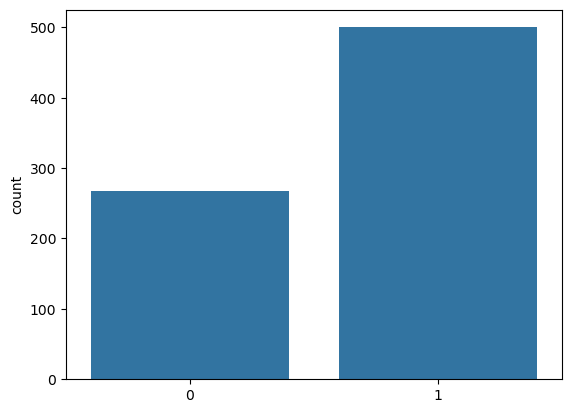

In [143]:
# df['Outcome'].value_counts()
sns.barplot(y=df['Outcome'].value_counts(), x=df['Outcome'].unique())

In [144]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Input Data and Target Labels

In [145]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Data Scaling

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


### Training a Base Support Vector Classifier

In [148]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [149]:
help(SVC())

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `

In [150]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

### Make Predictions

In [151]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
y_pred
accuracy_score(y_test, y_pred)

0.7519685039370079

### Model Evaluation

In [152]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


def report(classifier):
    '''Takes in a model instance and plots out its Confusion Matrix'''
    y_preds = classifier.predict(X_test)
    print(classification_report(y_test, y_preds))
    cm = confusion_matrix(y_test, y_preds)
    cm_disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    cm_disp.plot()

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.64      0.62      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



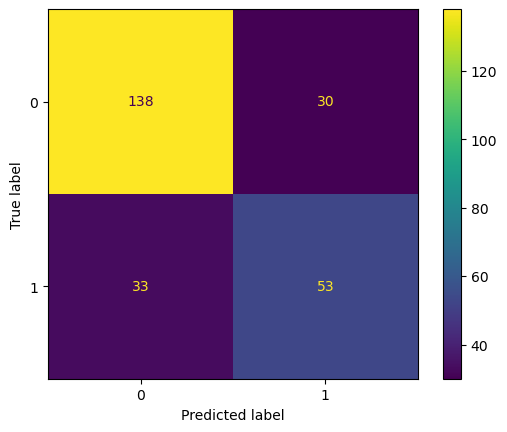

In [153]:
report(classifier=clf)


### Hyperparameter Optimization

In [154]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = [
    {'C': [0.01, 0.1, 1, 5, 10, 50, 100], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 5, 10, 50, 100], 'kernel': ['rbf']},
    {'C': [0.01, 0.1, 1, 5, 10, 50, 100],
        'kernel': ['poly'], 'degree': [2, 3, 5]},
]
grid = GridSearchCV(svm, param_grid, scoring='accuracy', verbose=3, n_jobs=-1)

In [156]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 50, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 50, 100],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 5, 10, 50, 100],
                          'degree': [2, 3, 5], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [163]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}